In [1]:
import glob
import pandas as pd
import numpy as np

In [2]:
maxRent = 1800

In [3]:
filenames = glob.glob("csvs/*.csv")

In [57]:
def addUtilitesCost(df, cost):
    df['rent_min'] = df['rent_min'] - cost
    df['rent_max'] = df['rent_max'] - cost

In [5]:
def isLatestScrape(df):
    dateToKeep = df.tail(1)['scraping_date'].values[0]
    timeToKeep = df.tail(1)['scraping_time'].values[0]
    
    isLatestDate = df['scraping_date'] == dateToKeep
    isLatestTime = df['scraping_time'] == timeToKeep
    
    return isLatestDate & isLatestTime

## Calibre

In [6]:
calibre = pd.read_csv(filenames[1])
addUtilitesCost(calibre, 288)

In [7]:
def calibreApts(calibre):
    aptsOfInterest = calibre[isLatestScrape(calibre) & (~calibre['floorplan_name'].str.contains("Hampton")) & 
                             (calibre['rent_min'] < maxRent)]
    groupbyCols = aptsOfInterest.columns[:-3].tolist() + [aptsOfInterest.columns[-1]] + [aptsOfInterest.columns[-3]]
    aptsFormatted = aptsOfInterest.groupby(groupbyCols).agg(start_move_in_day=('move_in_day', 'min'),
                                                            end_move_in_day=('move_in_day', 'max'))
    return aptsFormatted

In [8]:
calibreApts(calibre)

,,,,,,,,,,start_move_in_day,end_move_in_day
scraping_date,scraping_time,floorplan_name,bedroom,bathroom,squareFootage,rent_min,rent_max,move_in_year,move_in_month,,


In [9]:
calibre[(~calibre['floorplan_name'].str.contains("Hampton")) & (calibre['rent_min'] < maxRent)
       ].drop_duplicates(calibre.columns[2:-2], keep='last')

,scraping_date,scraping_time,floorplan_name,bedroom,bathroom,squareFootage,rent_min,rent_max,move_in_month,move_in_day,move_in_year


## Legacy

In [62]:
legacy = pd.read_csv(filenames[0])
addUtilitesCost(legacy, 359)

In [11]:
def legacyApts(legacy):
    aptsOfInterest = legacy[(legacy['bedroom'] >= 2) & (legacy['rent_min'] < maxRent) & (isLatestScrape(legacy))] # 
    groupbyCols = aptsOfInterest.columns[:6].tolist() + [aptsOfInterest.columns[-1]] + [aptsOfInterest.columns[-3]]
    aptsFormatted = aptsOfInterest.groupby(groupbyCols).agg(days_range_rent_min_min=('rent_min', 'min'),
                                                            days_range_rent_max_max=('rent_max', 'max'),
                                                            start_move_in_day=('move_in_day', 'min'),
                                                            end_move_in_day=('move_in_day', 'max'))
    return aptsFormatted

In [12]:
legacyApts(legacy).sort_values(['days_range_rent_min_min', 'move_in_month'])

days_range_rent_min_min  \
scraping_date scraping_time floorplan_name bedroom bathroom squareFootage move_in_year move_in_month                            
2022/06/01    23            b1dh_e         2.0     1.0      980.0         2022         6                                 1739   
                            b1dh           2.0     1.0      980.0         2022         6                                 1743   
                                                                                       7                                 1782   
                                                                                       8                                 1782   

                                                                                                      days_range_rent_max_max  \
scraping_date scraping_time floorplan_name bedroom bathroom squareFootage move_in_year move_in_month                            
2022/06/01    23            b1dh_e         2.0     1.0      980.0         2022         6                                 2282   
                            b1dh           2.0     1.0      980.0         2022         6                                 2335   
                                                                                       7                                 2452   
                                                                                       8                                 2782   

                                                                                                      start_move_in_day  \
scraping_date scraping_time floorplan_name bedroom bathroom squareFootage move_in_year move_in_month                      
2022/06/01    23            b1dh_e         2.0     1.0      980.0         2022         6                              1   
                            b1dh           2.0     1.0      980.0         2022         6                              1   
                                                                                       7                              1   
                                                                                       8                              1   

                                                                                                      end_move_in_day  
scraping_date scraping_time floorplan_name bedroom bathroom squareFootage move_in_year move_in_month                   
2022/06/01    23            b1dh_e         2.0     1.0      980.0         2022         6                           15  
                            b1dh           2.0     1.0      980.0         2022         6                           30  
                                                                                       7                           31  
                                                                                       8                           14

In [13]:
legacyApts(legacy).reset_index()['floorplan_name'].unique()

array(['b1dh', 'b1dh_e'], dtype=object)

In [17]:
legacy[(legacy['floorplan_name'] == 'b1dh') & (legacy['move_in_month'] == 6) & (legacy['move_in_day'] == 1)]

,scraping_date,scraping_time,floorplan_name,bedroom,bathroom,squareFootage,rent_min,rent_max,move_in_month,move_in_day,move_in_year
148,2022/05/20,12,b1dh,2.0,1.0,980.0,1776,2312,6,1,2022
527,2022/05/22,10,b1dh,2.0,1.0,980.0,1775,2311,6,1,2022
979,2022/05/22,14,b1dh,2.0,1.0,980.0,1775,2311,6,1,2022
1431,2022/05/22,23,b1dh,2.0,1.0,980.0,1775,2311,6,1,2022
1883,2022/05/23,0,b1dh,2.0,1.0,980.0,1775,2311,6,1,2022
...,...,...,...,...,...,...,...,...,...,...,...
97937,2022/06/01,18,b1dh,2.0,1.0,980.0,1734,2319,6,1,2022
98368,2022/06/01,19,b1dh,2.0,1.0,980.0,1734,2319,6,1,2022
98799,2022/06/01,21,b1dh,2.0,1.0,980.0,1734,2319,6,1,2022
99217,2022/06/01,22,b1dh,2.0,1.0,980.0,1734,2319,6,1,2022


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

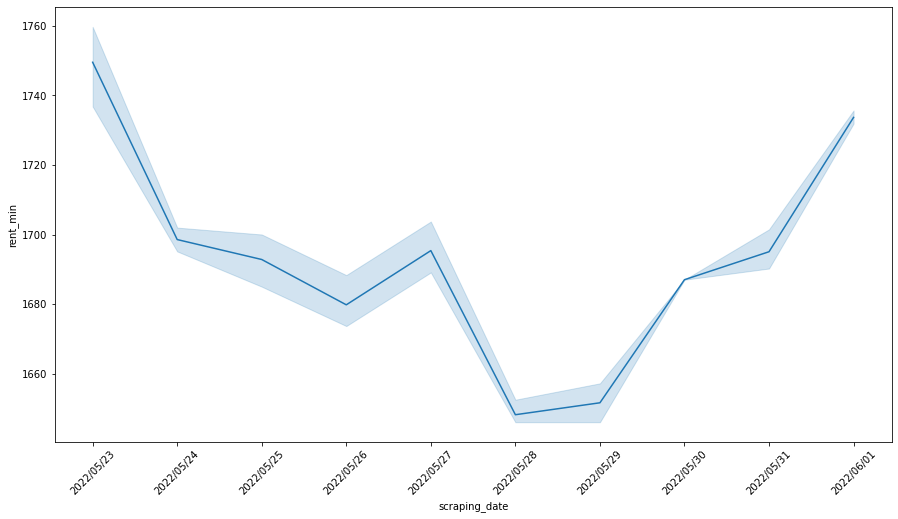

In [39]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(x='scraping_date', y='rent_min',
             data=legacy[(legacy['floorplan_name'] == 'b1dh') & (legacy['move_in_month'] == 6) & (legacy['move_in_day'] == 1)])
plt.xticks(rotation=45)

In [45]:
legacy[['scraping_year', 'scraping_month', 'scraping_day']] = legacy.scraping_date.str.split('/', expand=True).apply(pd.to_numeric)

In [ ]:
from datetime import date

d0 = date(2008, 8, 18)
d1 = date(2008, 9, 26)
delta = d1 - d0
print(delta.days)

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(x='scraping_date', y='rent_min',
             data=legacy[(legacy['floorplan_name'] == 'b1dh') & (legacy['move_in_month'] == 6) & (legacy['move_in_day'] == 1)])
plt.xticks(rotation=45)

In [ ]:
legacy[(legacy['bedroom'] >= 2) & 
       (legacy['rent_min'] < maxRent) & 
       (isLatestScrape(legacy))].sort_values(['floorplan_name', 'move_in_month', 'move_in_day'])

## Madison

In [ ]:
madison = pd.read_csv(filenames[2])
addUtilitesCost(madison, 353)

In [ ]:
def madisonApts(madison):
    aptsOfInterest = madison[isLatestScrape(madison) & (madison['bedroom'] >= 2) & (madison['rent_min'] < maxRent)]
    return aptsOfInterest

In [ ]:
madisonApts(madison)

In [ ]:
madison[(madison['bedroom'] >= 2) & (madison['rent_min'] < maxRent)].drop_duplicates(madison.columns[2:-2], keep='last')